# K-Means

## Ejercicio 1: Datos Bancarios

### Importar Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

from mpl_toolkits.mplot3d import Axes3D

### Conocer la Data

In [ ]:
prestamos = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/k-means-prestamos.csv", encoding='utf-8')

In [ ]:
prestamos.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


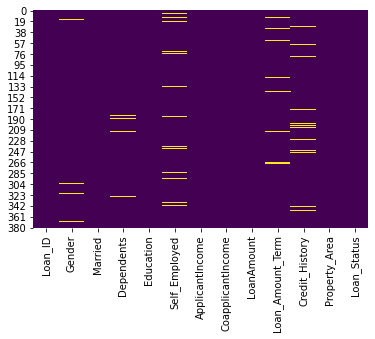

In [ ]:
sns.heatmap(prestamos.isnull(), cbar=False, cmap='viridis')

In [ ]:
prestamos.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [ ]:
prestamos.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


En este caso encontramos que existen datos nulos en diversos casos, por lo que se debe hacer un inputación en dichos campos.

### Imputación a columnas tipo Float

Los campos Loan_Amount_Term, y Credit_History, tienen campos nulos, pero si primero les aplico el LabelEncoder, prodrían llegar a distorcionar los datos, por lo cual primero imputare sus datos nulos. 

He decido que para rellenar los datos nulos de las 2 columnas, tomare el promedio de cada una. En el caso de Loan_Amount_Term, los valores son 60, 120, 180, 240, 300, 360, y 480. Y en caso de Credit_History los valores son 0 y 1.

In [ ]:
def imp_Loan_Amount_Term(col):
  loan_amount_term = col[0]

  if pd.isnull(loan_amount_term):
    return prestamos['Loan_Amount_Term'].mean()
  return loan_amount_term

In [ ]:
prestamos['Loan_Amount_Term'] = prestamos[['Loan_Amount_Term']].apply(imp_Loan_Amount_Term, axis=1)

In [ ]:
prestamos['Loan_Amount_Term'] = prestamos['Loan_Amount_Term'].astype('int')

In [ ]:
def imp_Credit_History(col):
  credit_history = col[0]

  if pd.isnull(credit_history):
    return prestamos['Credit_History'].mean()
  return credit_history

In [ ]:
prestamos['Credit_History'] = prestamos[['Credit_History']].apply(imp_Credit_History, axis=1)

In [ ]:
prestamos['Credit_History'] = prestamos['Credit_History'].astype('int')

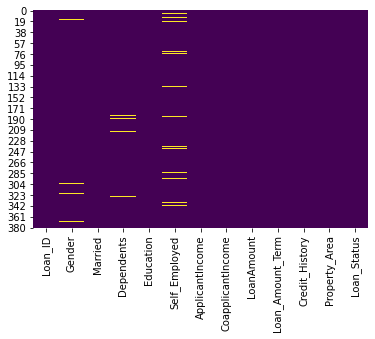

In [ ]:
sns.heatmap(prestamos.isnull(), cbar=False, cmap='viridis')

### Normalización - Imputación de datos

Los campos Gender, Dependents y Self_Employed son campos de tipo Object, ya sea porque son textos, o algunos campos poseen simbolos. A estos campos, les aplico LabelEncoder, pero para imputar los datos debo tener en cuenta algunos aspectos.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
captura_caracteristicas = [x for x in prestamos.columns if prestamos[x].dtype=='object']

In [ ]:
for col in captura_caracteristicas:
  if col in prestamos.columns:
    i = prestamos.columns.get_loc(col)
    prestamos.iloc[: , i] = prestamos.apply(lambda i:label_encoder.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [ ]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    int64  
 1   Gender             381 non-null    int64  
 2   Married            381 non-null    int64  
 3   Dependents         381 non-null    int64  
 4   Education          381 non-null    int64  
 5   Self_Employed      381 non-null    int64  
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    int64  
 10  Credit_History     381 non-null    int64  
 11  Property_Area      381 non-null    int64  
 12  Loan_Status        381 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 38.8 KB


Luego de aplicar el LabelEncoder, los datos nulos de las 3 columnas mencionadas anteriormente, desaparecen, debido a que son asumidas por la función como datos que debe convertir tambien a númerico.

La columna Gender, solo presenta 2 valores Female y Male. Luego de convertise en número, quedan de la siguiente manera:

|Valor del Campo|Asignación|
|---------------|----------|
|Female|0|
|Male|1|
|NA|2|

Es por esta razón que a los campos asignados con el número 2, les aplico la imputación de datos. En este caso, decido imputarlos en base a si tienen un historial crediticio o no.

In [ ]:
def imp_gender(cols):
  gender = cols[0]
  credit_history = cols[1]

  if gender == 2:
    return prestamos['Credit_History'].mean()
  return gender

In [ ]:
prestamos['Gender'] = prestamos[['Gender', 'Credit_History']].apply(imp_gender, axis=1)

In [ ]:
prestamos['Gender'] = prestamos['Gender'].astype('int')

La columna Dependents queda con la siguiente asignación:

|Valor del Campo|Asignación|
|---------------|----------|
|0|0|
|1|1|
|2|2|
|3+|3|
|NA|4|

Por tal motivo la imputación la aplico a los campos con un valor de 4, comparandolos con los campos de Married

In [ ]:
def imp_dependents(cols):
  dependents = cols[0]
  married = cols[1]

  if dependents == 4:
    if married == 0:
      return prestamos[prestamos['Married']==0]['Dependents'].mean()
    elif married == 1:
      return prestamos[prestamos['Married']==1]['Dependents'].mean()
  return dependents

In [ ]:
prestamos['Dependents'] = prestamos[['Dependents','Married']].apply(imp_dependents, axis=1)

In [ ]:
prestamos['Dependents'] = prestamos['Dependents'].astype('int')

La columna Self_Employed presenta la siguiente asignación:

|Valor del Campo|Asignación|
|---------------|----------|
|No|0|
|Yes|1|
|NA|2|

Los campos nulos los imputo comparando con el género.

In [ ]:
def imp_Self_Employed(cols):
  self_employed = cols[0]
  gender = cols[1]

  if self_employed == 2:
    if gender == 0:
      return prestamos[prestamos['Gender']==0]['Self_Employed'].mean()
    elif gender == 1:
      return prestamos[prestamos['Gender']==1]['Self_Employed'].mean()
  return self_employed

In [ ]:
prestamos['Self_Employed'] = prestamos[['Self_Employed', 'Gender']].apply(imp_Self_Employed, axis=1)

In [ ]:
prestamos['Self_Employed'] = prestamos['Self_Employed'].astype('int')

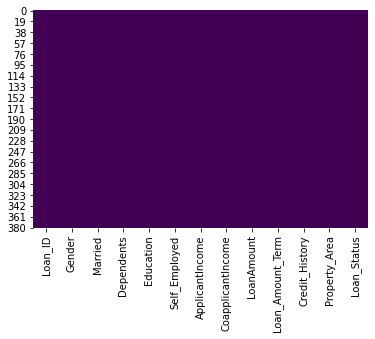

In [ ]:
sns.heatmap(prestamos.isnull(), cbar=False, cmap='viridis')

In [ ]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    int64  
 1   Gender             381 non-null    int64  
 2   Married            381 non-null    int64  
 3   Dependents         381 non-null    int64  
 4   Education          381 non-null    int64  
 5   Self_Employed      381 non-null    int64  
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   381 non-null    int64  
 10  Credit_History     381 non-null    int64  
 11  Property_Area      381 non-null    int64  
 12  Loan_Status        381 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 38.8 KB


A las columnas de CoapplicantIncome y LoanAmount, decido convertirlas a tipo entero. La primera columna presenta muy pocos datos flotantes, por lo que su conversión no representa un gran riesgo a la estadística final. La segunda columna no presenta decimales, los datos solo estan acompoñados por un .0

In [ ]:
prestamos['CoapplicantIncome'] = prestamos['CoapplicantIncome'].astype('int')
prestamos['LoanAmount'] = prestamos['LoanAmount'].astype('int')

In [ ]:
prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            381 non-null    int64
 1   Gender             381 non-null    int64
 2   Married            381 non-null    int64
 3   Dependents         381 non-null    int64
 4   Education          381 non-null    int64
 5   Self_Employed      381 non-null    int64
 6   ApplicantIncome    381 non-null    int64
 7   CoapplicantIncome  381 non-null    int64
 8   LoanAmount         381 non-null    int64
 9   Loan_Amount_Term   381 non-null    int64
 10  Credit_History     381 non-null    int64
 11  Property_Area      381 non-null    int64
 12  Loan_Status        381 non-null    int64
dtypes: int64(13)
memory usage: 38.8 KB


### Graficar la Data

In [ ]:
prestamos.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,190.000000,0.763780,0.598425,0.677165,0.270341,0.091864,3579.845144,1277.272966,104.986877,340.839895,0.771654,1.052493,0.711286
std,110.129469,0.425318,0.490861,0.985809,0.444720,0.289213,1419.813818,2340.818546,28.358464,67.549967,0.420319,0.779592,0.453761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2600.000000,0.000000,90.000000,360.000000,1.000000,0.000000,0.000000
50%,190.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3333.000000,983.000000,110.000000,360.000000,1.000000,1.000000,1.000000
75%,285.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4288.000000,2016.000000,127.000000,360.000000,1.000000,2.000000,1.000000
max,380.000000,1.000000,1.000000,3.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000


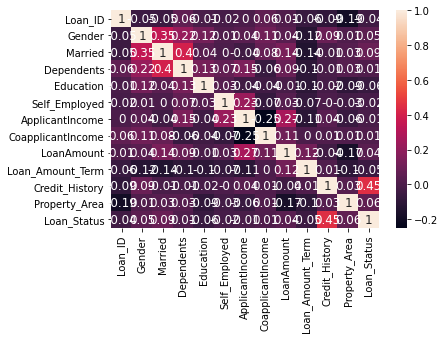

In [ ]:
corr_matrix = prestamos.corr().round(2)
sns.heatmap(corr_matrix, annot=True, annot_kws={'size': 12})

El ejercicio quiere evaluar si es apto o no hacerle el préstamo a una persona, para ello, los campos "mas importantes" son LoanAmount y ApplicantIncome

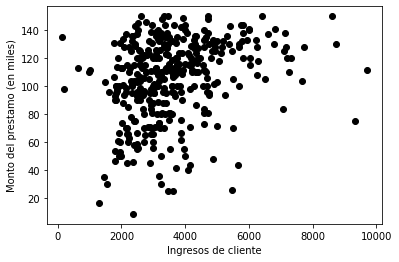

In [38]:
X = prestamos[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('Monto del prestamo (en miles)')
plt.show()

### Buscar los Centroides

La sigla WCSS se refiere a la Suma de Cuadrados de las Distancias

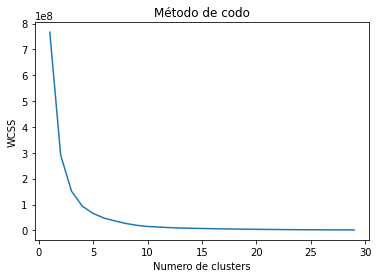

In [39]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 30), wcss)
plt.title('Método de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

print(centroids)
print(labels)

[[ 112.94805195 4482.49350649]
 [  95.96581197 2196.5042735 ]
 [ 117.23076923 7852.07692308]
 [ 103.7972028  3332.02097902]
 [ 119.61290323 5910.38709677]]
[0 3 1 4 1 3 1 1 1 0 3 3 0 1 2 1 3 3 0 1 3 3 0 3 1 3 3 3 1 1 0 0 3 4 4 1 0
 1 3 0 0 1 1 3 3 1 3 0 3 2 0 1 3 0 3 1 3 3 0 1 3 1 3 3 0 3 1 1 0 1 0 3 2 1
 4 3 0 1 0 1 3 3 1 1 3 0 0 3 0 1 1 1 0 4 1 3 3 1 3 2 0 1 1 1 3 0 3 1 3 1 1
 0 3 1 1 0 3 0 1 3 1 3 0 0 3 0 1 3 3 4 3 3 1 3 0 0 1 0 3 4 0 1 3 3 3 3 3 3
 4 1 4 3 4 2 4 3 1 3 1 4 4 0 1 2 0 0 3 3 3 3 1 3 1 3 0 0 1 1 3 1 3 0 3 0 3
 4 0 0 1 1 3 0 1 0 3 1 3 3 1 4 3 3 1 3 1 0 3 0 0 1 0 3 3 4 0 1 3 1 3 1 4 1
 3 3 3 0 0 3 4 4 1 0 3 1 0 2 0 3 4 3 2 0 3 1 1 4 1 1 3 3 3 3 3 1 3 1 1 1 0
 1 1 3 1 3 1 3 4 1 1 2 1 0 4 3 1 2 4 1 3 1 2 0 3 0 3 3 1 1 0 1 2 3 0 0 2 0
 0 4 3 1 0 1 0 1 3 3 1 1 3 1 1 3 3 3 1 0 3 1 3 0 3 3 3 3 1 3 1 3 3 1 1 4 3
 1 4 0 3 1 3 3 0 1 3 1 3 3 1 0 3 3 4 1 3 4 0 3 3 1 3 4 3 3 3 1 1 3 1 3 1 1
 0 1 3 3 3 3 4 3 3 0 0]


In [41]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
print(centroids[:, 0])

[112.94805195  95.96581197 117.23076923 103.7972028  119.61290323]


A continuacíon se muestran los grupos según el aplicante y los ingresos del mismo

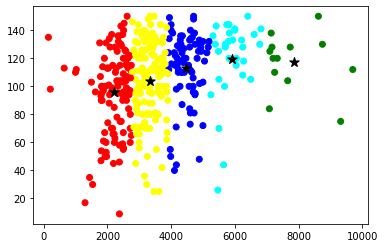

In [43]:
f1 = prestamos['ApplicantIncome'].values
f2 = prestamos['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

### Análisis en Tablas

Luego de hacer la normalización de datos, los valores de Education quedaron de la siguiente manera:

|Valor original|Asignado|
|--------------|--------|
|Graduate|0|
|Not Graduate|1|

In [44]:
df_cluster = pd.DataFrame()

df_cluster['data_index'] = prestamos.index.values
df_cluster['data_index'] = prestamos.Education
df_cluster['cluster'] = kmeans.labels_
df_cluster.head()

,data_index,cluster
0,0,0
1,0,3
2,1,1
3,0,4
4,1,1


In [47]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
3,0,4
33,0,4
34,0,4
74,0,4
93,0,4
129,1,4
139,0,4
148,0,4
150,0,4
152,0,4
